In [19]:
import matplotlib.pyplot as plt
import scipy.interpolate as spi
from sklearn.linear_model import LinearRegression as LR
import numpy as np
import pandas as pd
import sympy as sy
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

# 初始化，x、y为坐标，Mx、My为Fortran计算出的二阶导数值，theta为Fortran计算出了线性拟合参数b
# n = 20
x = [-0.2, 0.01, 0.16, 0.3, 0.44, 0.56, 0.67, 0.77, 0.87, 0.95, 0.99, 0.93, 0.85, 0.73, 0.59, 0.42, 0.29, 0.16, 0.05, -0.11, -0.2]
y = [0.22, 0.15, 0.13, 0.12, 0.13, 0.15, 0.18, 0.22, 0.27, 0.32, 0.39, 0.4, 0.41, 0.42, 0.43, 0.42, 0.41, 0.4, 0.36, 0.32, 0.22]
# Mx = [0.50709311714530891, -0.22746861616752340, 4.2781310867928156E-002, -3.6565142043757702E-003, -2.8155432864359401E-002, -3.7216398972686393E-003, -1.6957950326107054E-002, 1.1553140794287205E-002, -2.9254255223173112E-002, -1.4536363088545445E-002, -0.15260006354080916, 2.4936474200634589E-002, -6.7145718820811259E-002, 3.6462723365777105E-003, -6.7439613712450261E-002, 8.6112532988534593E-002, -3.7010568309589723E-002, 6.1929740249824290E-002, -9.0708395371916439E-002, 9.0381441575125630E-004, 0.50709311714530891]
# My = [4.9409026797001335E-004, 7.8011944728198723E-002, -1.2541976469125507E-002, 3.2156038038295066E-002, 3.9177992819944257E-003, 1.2172841723718993E-002, 7.3907766026706191E-003, 1.8263994645139545E-002, -2.0446633589753450E-002, 6.3522360899939928E-002, -0.11364274563698991, 3.1048786156839283E-002, -1.0552577804301562E-002, 1.1161525060366965E-002, -3.4093343623231971E-002, 5.2116062456102332E-003, 1.3247097454725363E-002, -5.8199996064511685E-002, 3.9552879650763990E-002, -0.10001170135247860, 4.9409026797001335E-004]
Mx = np.array([-0.140131831    ,   -1.78772118E-02,   -2.83590928E-02 ,   1.13133304E-02  , -1.68938730E-02 ,  -3.73814115E-03 ,  -2.81535052E-02 ,  -3.64771765E-03 ,   4.27441970E-02,  -0.227328926   ,    0.506571352  ,      1.04346313E-03,   -9.07454938E-02  ,  6.19385280E-02,   -3.70086394E-02  ,  8.60960335E-02 ,  -6.73755333E-02,    3.40646319E-03  , -6.62505552E-02 ,   2.15956252E-02, -0.140131831])
My = np.array([-9.81184021E-02 ,  5.93622401E-02 , -1.93305090E-02,   1.79596134E-02  , 7.49217113E-03 ,  1.20716458E-02 ,  4.22118977E-03 ,  3.10436692E-02 , -8.39588884E-03 ,  6.25399649E-02 ,  5.82359433E-02, -0.115483731   ,    4.36989814E-02 , -5.93123697E-02  , 1.35504892E-02 ,  5.11040958E-03 , -3.39919478E-02 ,  1.08571453E-02 , -9.43645369E-03 ,  2.68886685E-02 , -9.81184021E-02])
theta = [-0.61675402721062844, 3.7372895747393553E-002, 6.4038200357358814, 2.6440756536123722, -13.302206388291150]
n = len(Mx) - 1

21

[[0.0203757698666667 -0.131193225100000 0.460949286233333
  -0.550131831000000]
 [-0.00174698016666667 0.00154327510000000 0.175476247666667
  -0.333149754400000]
 [0.00661207053333333 -0.0736881812000000 0.411170658666667
  -0.588844249600000]
 [-0.00470120056666667 0.0620710720000000 -0.131866413433333
  0.135205338000000]
 [0.00219262197500000 -0.0413362661250000 0.375170327650000
  -0.676522732000000]
 [-0.00406922734166667 0.0713770215750000 -0.301109408083333
  0.676036777600000]
 [0.00408429792500000 -0.0998470090250000 0.907458786050000
  -2.19062224840000]
 [0.00773198577500000 -0.187391517425000 1.60781488305000
  -4.05823866600000]
 [-0.0450121871666667 1.23670115200000 -11.2190191658333 34.4822636250000]
 [0.122316713000000 -3.78316585300000 38.9996509100000 -133.046636800000]
 [-0.0842546481450000 3.03368906478500 -36.3857531764900 146.299844783400]
 [-0.0152981594883333 0.551255473145000 -6.68655002859667
  28.2230318061200]
 [0.0254473369666667 -1.03781888860000 13.98141

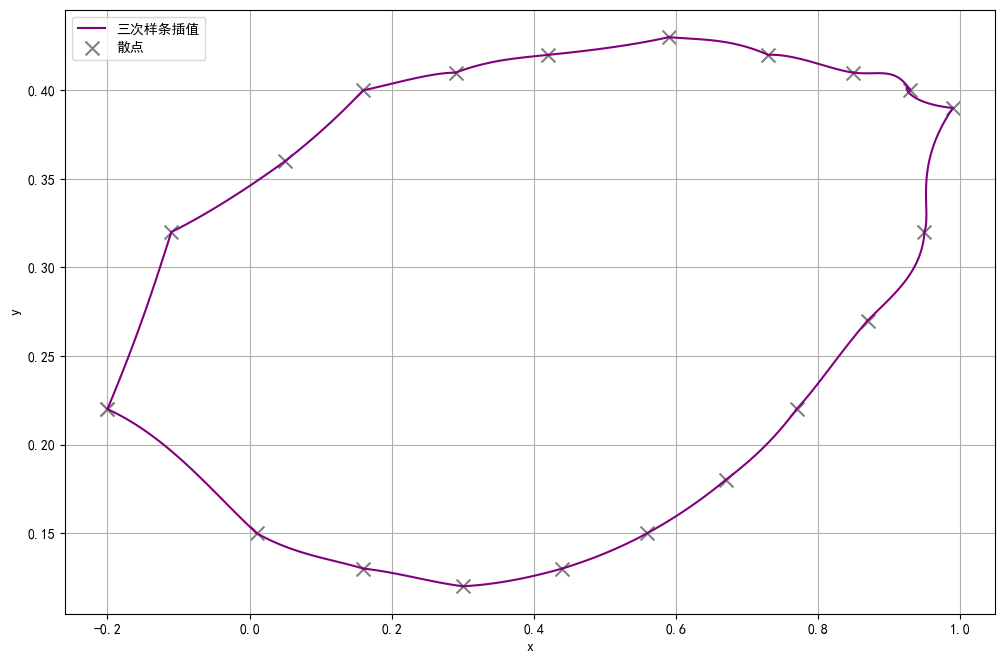

In [20]:


# 通过Mx,My计算各个区间上的分段插值函数
U = sy.symbols('U')
xu, yu= [], []
xu_coeffs, yu_coeffs = [], []
for i in range(1, n + 1):
    phi = sy.simplify(Mx[i - 1] / 6 * (i + 1 - U) ** 3 + Mx[i] / 6 * (U - i) ** 3 + (x[i] - Mx[i] / 6) * (U - i) + (x[i - 1] - Mx[i - 1] / 6) * (i + 1 - U))
    psi = sy.simplify(My[i - 1] / 6 * (i + 1 - U) ** 3 + My[i] / 6 * (U - i) ** 3 + (y[i] - My[i] / 6) * (U - i) + (y[i - 1] - My[i - 1] / 6) * (i + 1 - U))
    phi = sy.Poly(phi)
    psi = sy.Poly(psi)
    xu.append(np.poly1d(phi.coeffs()))
    yu.append(np.poly1d(psi.coeffs()))
    xu_coeffs.append(phi.coeffs())
    yu_coeffs.append(psi.coeffs())

xu_coeffs = np.array(xu_coeffs)
yu_coeffs = np.array(yu_coeffs)
print(xu_coeffs)

    
# 在一张图中绘制插值曲线和拟合曲线
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

# 分段绘制插值曲线
for i in range(n):
    u = np.linspace(i + 1, i + 2, 100)
    if i == n - 1:
        plt.plot(xu[i](u), yu[i](u), color='purple', label='三次样条插值')
    else:
        plt.plot(xu[i](u), yu[i](u), color='purple')

# # 利用等高线绘制拟合曲线
# xx = np.linspace(-0.3, 1.1, 100)
# yy = np.linspace(0.1, 0.45, 100)
# xx, yy = np.meshgrid(xx, yy)
# zz = theta[0] + theta[1] * xx + theta[2] * yy + theta[3] * np.multiply(xx, yy) + theta[4] * np.multiply(yy, yy) - np.multiply(xx, xx) 
# CS = ax.contour(xx, yy, zz, 0, colors='pink')
# CS.collections[0].set_label('线性回归')

# 绘制散点图
ax.scatter(x, y, c='gray', marker='x', s=100, label='散点')

# 图片细节调整
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend(loc='upper left')
# plt.title('三次样条插值和线性回归')
# plt.savefig('cslr2.png')
plt.show()
plt.close()